In [61]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)


In [65]:
import sklearn.datasets

Xraw, yraw = sklearn.datasets.load_breast_cancer(return_X_y=True)


female = pd.read_csv('../11 Introduction/ANSUR II FEMALE Public.csv')
male = pd.read_csv('../11 Introduction/ANSUR II MALE Public.csv')
human = pd.concat([male, female]).sample(frac=1)


In [53]:
Xraw.shape

(569, 30)

(array([ 212.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  357.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

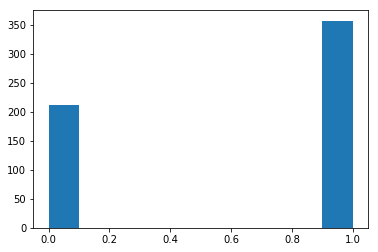

In [29]:
plt.hist(yraw)

In [76]:
num_mal = 50

Xben = Xraw[yraw == 0.0, :]
Xmal = Xraw[yraw == 1.0, :]
Xmal = Xmal[:num_mal, :]

y = np.concatenate([np.zeros(Xben.shape[0]), np.ones(num_mal)], axis=0)

X = np.concatenate([Xben, Xmal], axis=0)


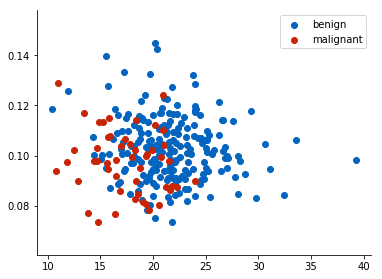

In [164]:
plt.figure(figsize=(6, 4.5))

f1 = 1
f2 = 4

plt.scatter(Xben[:, f1], Xben[:, f2], color=BLUE, label='benign')
plt.scatter(Xmal[:, f1], Xmal[:, f2], color=RED, label='malignant')

plt.xlabel('')
plt.ylabel('')

plt.legend()

clean()
plt.savefig('bc-data.pdf')

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
[0 1 1 1 1 0 1 1 0 1 1 1 1 1 1]
[1 1 0 0 0 1 0 0 1 1 1 0 0 1 0]
[1 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
[1 0 0 1 0 1 1 0 0 1 1 0 0 1 1]
[1 1 0 1 1 0 0 0 1 0 1 0 1 1 1]
[0 1 1 0 0 1 0 0 0 0 1 0 0 0 1]
[0 1 0 1 1 0 1 0 0 0 0 1 1 0 0]
[1 1 1 0 1 1 1 1 1 0 0 1 1 0 1]
[1 0 0 1 0 1 1 1 1 0 1 1 1 1 1]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 1 0 1 0 1 1 0 1 1]
[0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
[1 1 0 1 1 0 1 0 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
[1 1 1 0 0 0 1 1 1 1 0 1 0 1 0]
[1 1 1 0 1 1 1 1 1 1 1 0 0 0 1]
[1 1 1 1 1 1 1 1 1 1 0 0 1 0 0]
[0 1 0 0 1 1 1 1 1 0 1 1 1 1 1]
[0 1 1 1 0 1 1 0 0 1 1 1 1 1 1]


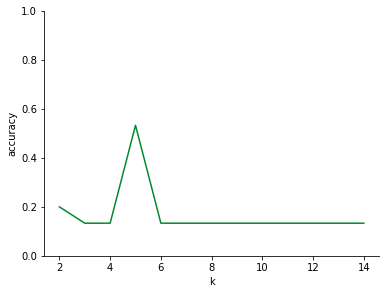

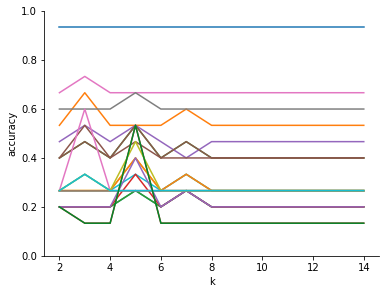

In [128]:
xrtr = Xraw[:50, [1, 4]]
yrtr = yraw[:50]

plt.figure(figsize=(6, 4.5))

r = 3
fr = 100 + r * 15
to = 100 + (r+1) * 15
    
xrts = Xraw[fr:to, [1, 4]]
yrts = yraw[fr:to]

print(yrts)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = []
accs = []
for k in range(2, 15):
    knn = KNeighborsClassifier(k)
    knn.fit(xrtr, yrtr)

    ks.append(k)
    accs.append(accuracy_score(yrts, knn.predict(xrts)))

old = accs
plt.plot(ks, old, color=GREEN)
    
plt.xlabel('k')
plt.ylabel('accuracy')

plt.ylim((0,1))

clean()
    
plt.savefig('small-test-set-1.pdf')    
plt.figure(figsize=(6, 4.5))

for r in range(20):
    
    fr = 100 + r * 15
    to = 100 + (r+1) * 15
    
    xrts = Xraw[fr:to, [1, 4]]
    yrts = yraw[fr:to]
    
    print(yrts)

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    ks = []
    accs = []
    for k in range(2, 15):
        knn = KNeighborsClassifier(k)
        knn.fit(xrtr, yrtr)

        ks.append(k)
        accs.append(accuracy_score(yrts, knn.predict(xrts)))

    plt.plot(ks, accs)
    
plt.plot(ks, old, color=GREEN)
    
plt.xlabel('k')
plt.ylabel('accuracy')

clean()

plt.ylim((0,1))
    
plt.savefig('small-test-set-multi.pdf')    
plt.figure(figsize=(6, 4.5))

[1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 

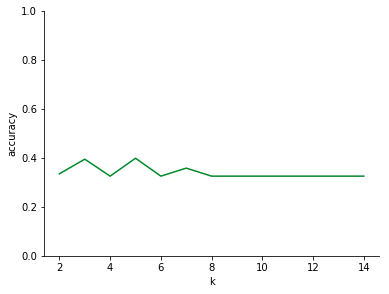

In [129]:
xrtr = Xraw[:50, [1, 4]]
yrtr = yraw[:50]

plt.figure(figsize=(6, 4.5))
    
xrts = Xraw[50:, [1, 4]]
yrts = yraw[50:]

print(yrts)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = []
accs = []
for k in range(2, 15):
    knn = KNeighborsClassifier(k)
    knn.fit(xrtr, yrtr)

    ks.append(k)
    accs.append(accuracy_score(yrts, knn.predict(xrts)))

old = accs
plt.plot(ks, old, color=GREEN)
    
plt.xlabel('k')
plt.ylabel('accuracy')

plt.ylim((0,1))

clean()
    
plt.savefig('big-test-set-1.pdf') 

In [131]:
short = pd.Series([3, 4, 6, 3])

short.describe()


count    4.000000
mean     4.000000
std      1.414214
min      3.000000
25%      3.000000
50%      3.500000
75%      4.500000
max      6.000000
dtype: float64

In [132]:
short.sem()

0.70710678118654757

In [148]:
long = pd.Series([3, 4, 5, 2, 8, 7,
8, 2, 3, 5, 7, 0, 2, 4, 
6, 7, 0, 4, 5, 1, 8, 7,
1, 2, 3, 5, 7, 4])
long.describe()

count    28.000000
mean      4.285714
std       2.492316
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       8.000000
dtype: float64

In [149]:
long.sem()

0.47100349603040598

In [150]:
!pip install statsmodels

In [153]:
import statsmodels.stats.proportion

In [163]:
statsmodels.stats.proportion.proportion_confint(50, 100)

(0.4020018007729973, 0.5979981992270027)

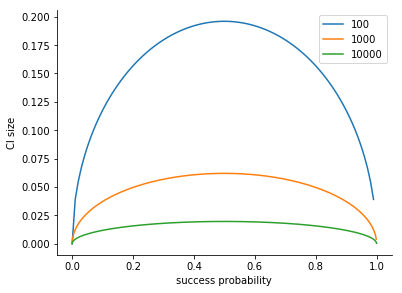

In [162]:
plt.figure(figsize=(6, 4.5))

for size in [100, 1000, 10000]:
    suc_prop = []
    interval_sizes = []
    for suc in range(size):
        
        lower, upper = statsmodels.stats.proportion.proportion_confint(suc, size)
        interval_sizes.append(upper - lower)
        suc_prop.append(suc/size)
    plt.plot(suc_prop, interval_sizes, label=size)
plt.legend()
clean()

plt.xlabel('success probability')
plt.ylabel('CI size')

plt.savefig('ci-size.pdf')